In [1]:
# approach is from this website: 
# https://www.pluralsight.com/guides/explore-python-libraries:-imbalanced-learn
# ADASYN takes ideas from SMOTE and builds on them. In particular, ADASYN selects 
# minority samples S so that “more difficult to classify” minority samples are 
# more likely to be selected. This allows the classifier to have more opportunity 
# to learn tough instances. The code for ADASYN is entirely analogous to that of 
# SMOTE, except you just replace the word “SMOTE” with “ADASYN”.

In [2]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# os.getcwd()

'C:\\Users\\wavau\\OneDrive\\desktop\\class_sessions\\home_steam_ml\\steam_ml_data\\ml_noteboooks'

In [4]:
# os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'learn_ADASYN_minmax.ipynb',
 'learn_ADASYN_no_scaling.ipynb',
 'learn_bal_random_forest_minmax.ipynb',
 'learn_bal_random_forest_no_scaling.ipynb',
 'learn_down_sample_majority_class_minmax.ipynb',
 'learn_down_sample_majority_class_no_scaling.ipynb',
 'learn_no_sample_adj_minmax.ipynb',
 'learn_no_sample_adj_noscaling.ipynb',
 'learn_SMOTE_1_minmax.ipynb',
 'learn_SMOTE_1_noscale.ipynb',
 'learn_up-sample_minority_min_max.ipynb',
 'learn_up-sample_minority_no_scaling.ipynb']

In [6]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\all_param.csv")
all_param_df.shape


(39624, 351)

In [7]:
# using binary classification for logistic regression
y_class = all_param_df['suc_class']

In [8]:
y_class

0        0
1        0
2        0
3        0
4        0
        ..
39619    1
39620    1
39621    1
39622    1
39623    1
Name: suc_class, Length: 39624, dtype: int64

In [9]:
# create new X parameters df
x_data = all_param_df.drop(['appid','maxccu','success_class','suc_class','followers']  , axis=1)

In [10]:
x_data.shape

(39624, 346)

In [11]:
# ADASYN selects "more difficult to classify" minority samples for better training the classifier

from imblearn.over_sampling import ADASYN

X_adasyn, y_adasyn = ADASYN().fit_sample(x_data, y_class)

In [12]:
# see classes are balanced
X_adasyn = pd.DataFrame(X_adasyn)
y_adasyn = pd.DataFrame(y_adasyn)
y_adasyn.iloc[:, 0].value_counts()

0    38818
1    38761
Name: suc_class, dtype: int64

In [13]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, random_state=5)

In [14]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [15]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler().fit(X_train)

In [17]:
# apply the trained scales (MinMax) to the training and testing data

X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

In [18]:
# Instantiate and Train model
y = y_train
X = X_train_scaled

clf_1 = LogisticRegression(max_iter=1000).fit(X, y)

C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [19]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {clf_1.score(X, y)}")
print(f"Testing Data Score: {clf_1.score(X_test_scaled, y_test)}")

Training Data Score: 0.7929327650213117
Testing Data Score: 0.7930394431554524


In [20]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = clf_1.predict(X_test_scaled)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82      9754
           1       0.90      0.65      0.76      9641

    accuracy                           0.79     19395
   macro avg       0.82      0.79      0.79     19395
weighted avg       0.82      0.79      0.79     19395



In [21]:
# thinking about baseline results:
# Support is balanced - ~9700 of 1's and 0's
# Percision: for no success: 73%, better for successful games: 90%
# Percision= % of labeling an outcome that is correct from all the labels of that outcome
# labeled cancer correctly from all labeled cancer
# Recall: Fraction of positives found, 93% for 0, 65% for 1
# Recall - % of true label found from all true cases of the label
# how many of the cancer cases did you find
# f1 score: 79% due to overfitting on failure cases

<AxesSubplot:>

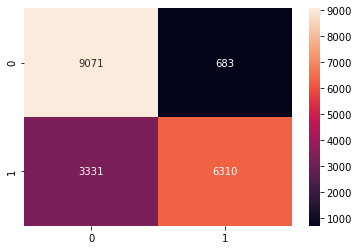

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf_1.predict(X_test_scaled)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")